In [49]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


# Comparative Transrate metrics

* Proportion of references with a CRB-BLAST hit 
* Reciprocal best hits where the top match in one direction is the same as the top match in the other direction. 
* Selects all alignments with e-values below the cutoff for each length as high-confidence predicted homologs
* Metrics: http://hibberdlab.com/transrate/metrics.html

### Linking MMETSP and SRR number 
- Enable cross comparison of the NCGR to Trinity assemblies

In [50]:
sra_run = pd.read_csv('../SraRunInfo.csv')
sra_map = sra_run[['Run', 'SampleName']]


In [87]:
# reference-based transrate evaluation
file_dib_v_ncgr = "../assembly_evaluation_data/transrate_reference_scores_nt.csv"
file_ncgr_v_dib = "../assembly_evaluation_data/transrate_reverse_scores_nt.csv"

#busco evaluation
file_ncgr_busco = "../assembly_evaluation_data/busco_scores_imicrobe.csv"
file_dib_busco = "../assembly_evaluation_data/busco_scores_MMETSP.csv"

# transrate scores
file_dib_transrate_scores = "../assembly_evaluation_data/transrate_scores.csv"
file_ncgr_transrate_scores = "../assembly_evaluation_data/transrate_imicrobe_scores.csv"

           

In [88]:
# Load in df and add the mmetsp/sra information
dib_v_ncgr = pd.read_csv(file_dib_v_ncgr)
#dib_v_ncgr = pd.merge(sra_map, dib_v_ncgr, on='Run')

ncgr_v_dib = pd.read_csv(file_ncgr_v_dib)
#ncgr_v_dib = pd.merge(sra_map, ncgr_v_dib, on='SampleName')

ncgr_busco = pd.read_csv(file_ncgr_busco)
#ncgr_busco = pd.merge(sra_map,ncgr_busco,on="SampleName")

dib_busco = pd.read_csv(file_dib_busco)
#dib_busco = pd.merge(sra_map,dib_busco,on="Run")

ncgr_transrate = pd.read_csv(file_ncgr_transrate_scores)
#ncgr_transrate = pd.merge(sra_map,ncgr_transrate,on="SampleName")

dib_transrate = pd.read_csv(file_dib_transrate_scores)
#dib_transrate = pd.merge(sra_map,dib_transrate,on="Run")

In [89]:
ncgr_v_dib.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,SampleName,Run
0,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,34508,150,7824,25837299,713.61073,7006,9052,0,11312,...,6963,0.15408,3940,0.08719,0.30197,NaN,NaN,NaN,MMETSP0909,SRR1296820
1,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,26070,150,14178,33695495,1280.92478,1750,14849,5,17505,...,6735,0.16146,3762,0.09019,0.35641,NaN,NaN,NaN,MMETSP1138,SRR1300349
2,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,11397,150,15904,15309248,1336.46775,444,6269,6,8733,...,3313,0.19532,1406,0.08289,0.40482,NaN,NaN,NaN,MMETSP0317,SRR1296715
3,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,64738,150,8263,46663561,690.73685,11225,17705,0,30694,...,15432,0.15336,8321,0.08269,0.29405,NaN,NaN,NaN,MMETSP0370,SRR1294439
4,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,19076,150,13688,25175591,1293.47038,2925,9425,4,11501,...,5248,0.19710,2543,0.09551,0.33218,NaN,NaN,NaN,MMETSP1412,SRR1300482


In [90]:
dib_v_ncgr.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,SampleName,Run
0,/mnt/scratch/ljcohen/mmetsp/Fragilariopsis_ker...,45190,201,7353,30484433,674.58360,0,9067,0,13644,...,7532,0.21827,6235,0.18068,0.39087,NaN,NaN,NaN,MMETSP0909,SRR1296820
1,/mnt/scratch/ljcohen/mmetsp/Pleurochrysis_cart...,41714,201,9909,29450488,706.00968,0,9669,0,15368,...,6048,0.23199,5240,0.20100,0.28758,NaN,NaN,NaN,MMETSP1138,SRR1300349
2,/mnt/scratch/ljcohen/mmetsp/Amphora_coffeiform...,16962,201,8944,13657203,805.16466,0,4499,0,7889,...,3361,0.29490,3064,0.26884,0.32689,NaN,NaN,NaN,MMETSP0317,SRR1296715
3,/mnt/scratch/ljcohen/mmetsp/Peridinium_aciculi...,100629,201,5930,62013692,616.26064,0,18236,0,43098,...,20018,0.30922,18750,0.28963,0.42000,NaN,NaN,NaN,MMETSP0370,SRR1294439
4,/mnt/scratch/ljcohen/mmetsp/Thalassiosira_weis...,26626,201,10522,30936082,1161.87493,0,11431,4,15744,...,6009,0.31500,5457,0.28607,0.44591,NaN,NaN,NaN,MMETSP1412,SRR1300482


In [91]:
#Set indexing value
#ncgr_v_dib = ncgr_v_dib.set_index('Run')
#dib_v_ncgr = dib_v_ncgr.set_index('Run')

#dib_busco = dib_busco.set_index('Run')
#ncgr_busco = ncgr_busco.set_index('Run')

#dib_transrate = dib_transrate.set_index('Run')
#ncgr_transrate = ncgr_transrate.set_index('Run')

dib_v_ncgr = dib_v_ncgr.drop_duplicates()
ncgr_v_dib = ncgr_v_dib.drop_duplicates()
dib_busco = dib_busco.drop_duplicates()
ncgr_busco = ncgr_busco.drop_duplicates()
dib_transrate = dib_transrate.drop_duplicates()
ncgr_transrate = ncgr_transrate.drop_duplicates()


### Plotting functions 


In [92]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#566573', color2='#F5B041', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    newdf = pd.DataFrame()
    newdf[df1name] = df1[column]
    newdf[df2name] = df2[column]
    newdf = newdf.dropna()
    newdf = newdf.drop_duplicates()
    # plot with different colors if df1 > or < then df2
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
#     ax.set_ylabel(column, fontsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#566573', color1='#F5B041', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax


## Checking out different variables reported by transrate

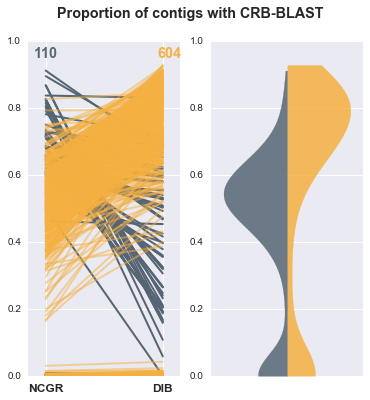

In [93]:
p_refs_with_CRBB, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'p_refs_with_CRBB', 'Proportion of contigs with CRB-BLAST')

In [80]:
p_refs_with_CRBB.loc[p_refs_with_CRBB.DIB < p_refs_with_CRBB.NCGR]


,NCGR,DIB
9,0.71763,0.32010
16,0.00633,0.00253
20,0.86759,0.16781
39,0.65118,0.19144
41,0.58179,0.55321
44,0.64500,0.59286
45,0.60977,0.50520
46,0.82540,0.15835
55,0.00083,0.00038
66,0.00085,0.00071


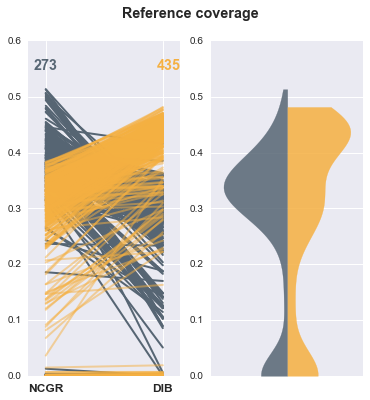

In [94]:
reference_coverage, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'reference_coverage', 'Reference coverage'
                                           , ymax = 0.6, ypos = 0.55)

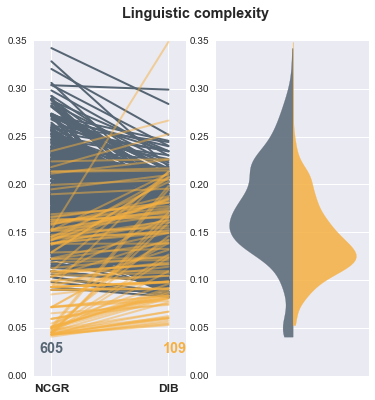

In [95]:
linguistic_complexity, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'linguistic_complexity', 'Linguistic complexity', ymax=0.35, ypos=0.025)

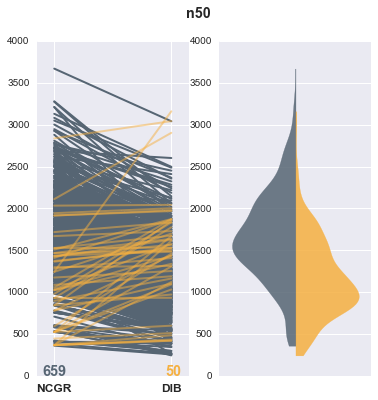

In [96]:
n50, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'n50', 'n50', ymax=4000)

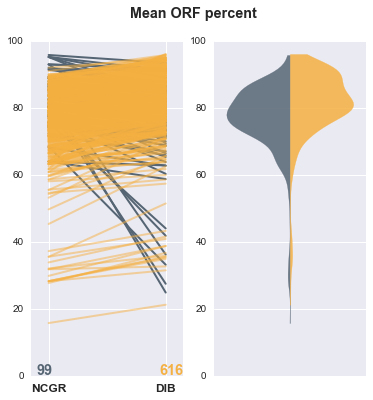

In [97]:
mean_orf_percent, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'mean_orf_percent', 'Mean ORF percent',ymax=100, ypos=0.5)

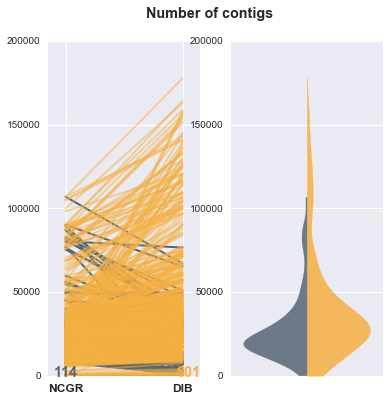

In [98]:
n_seqs, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'n_seqs', 'Number of contigs',ymax=200000, ypos=0.5)

In [99]:
n_seqs.loc[n_seqs.DIB < 5000]

,NCGR,DIB
20,11489,2228
31,380,758
46,15238,2921
70,8747,613
89,1220,2104
90,2883,3906
108,15102,1252
118,380,106
148,380,115
150,77388,341


# Comparing BUSCO scores

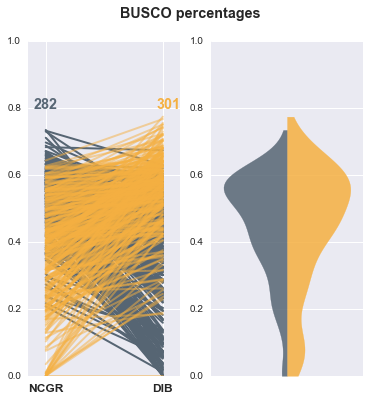

In [69]:
busco_scores, fig, ax = create_plots(ncgr_busco,dib_busco,'Complete_BUSCO_perc', 'BUSCO percentages',ymax=1.0, ypos=0.8)

In [70]:
busco_scores.loc[busco_scores.DIB < 0.1]

,NCGR,DIB
3,0.571096,0.065268
16,0.424242,0.002331
29,0.622378,0.060606
39,0.543124,0.072261
46,0.575758,0.000000
63,0.575758,0.069930
82,0.449883,0.074592
105,0.470862,0.000000
119,0.207459,0.011655
191,0.505828,0.034965


# Comparing Transrate scores

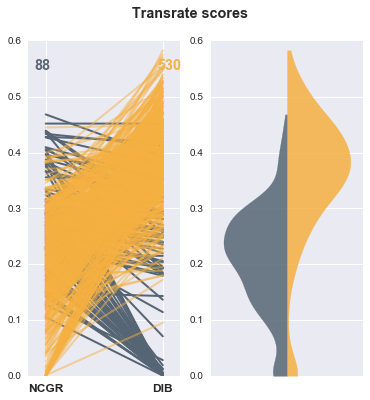

In [71]:
score,fig, ax = create_plots(ncgr_transrate,dib_transrate, 'score', 'Transrate scores',ymax=.6, ypos=0.55)

In [72]:
score.loc[score.DIB < 0.1]


,NCGR,DIB
6,0.26841,0.00520
8,0.30504,0.00097
55,0.19151,0.00398
67,0.28257,0.00090
77,0.33421,0.00490
84,0.17865,0.00064
97,0.12744,0.02814
99,0.25200,0.00630
101,0.24802,0.00018
107,0.18939,0.01201
